# Valeria Paolucci - Final project, Numerical Analysis 2018-2019

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
arc = load('mnist.npz')

x_train = arc['arr_0']
y_train = arc['arr_1']
x_test  = arc['arr_2']
y_test  = arc['arr_3']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


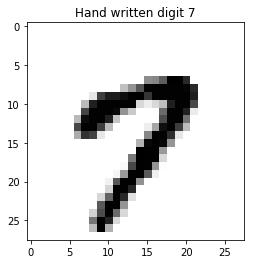

In [3]:
# Show image number 15, and write in the title what digit it should correspond to
N=15
imshow(x_train[N], cmap='gray_r')
_ = title('Hand written digit '+str(y_train[N]))

In [4]:
def classify(z, dist):
    all_distances = array([dist(x, z) for x in x_train])
    digit = y_train[argmin(all_distances)]
    return digit


# Assignment 1

Implement the following distance functions

- d_infty $$ d_{\infty}(a,b) := \max_{i,j} |b_{ij}-a_{ij}|$$
- d_one $$ d_1(a,b) := \sum_{i,j} |b_{ij}-a_{ij}|$$
- d_two $$ d_2(a,b) := \sqrt{\sum_{i,j} |b_{ij}-a_{ij}|^2}$$

that take two `(28,28)` images in input, and return a non-negative number.

In [5]:
def d_infty(a,b):
    return np.linalg.norm((b-a).ravel(), inf)

def d_one(a,b):
    return np.linalg.norm((b-a).ravel(), 1)

def d_two(a,b):
    return np.linalg.norm((b-a).ravel(), 2)

# Assignment 2

Write a function that, given a number `N`, and a distance function `dist`, computes the distance matrix D of shape `(N,N)` between the first `N` entries of `x_train`:

```
D[i,j] = dist(x_train[i], x_train[j])
```

performing the **minimum** number of operations (i.e., avoid computing a distance if it has already been computed before, i.e., keep in mind that dist(a,b) = dist(b,a)).

In [6]:
def compute_distance_matrix(N,dist):
    
    # D is of shape (N,N)
    D = zeros((N,N))
    # considering all the rows in D
    for i in range(N):
        # for each row, considering only the entries whose column index is smaller than i (the current row index)
        for j in range(i):
            # dist(a,b) = dist(b,a)
            D[i,j] = D[j,i] = dist(x_train[i],x_train[j])
            
    return D

# Assignment 3

Compute and plot the three distance matrices

- Dinfty
- D1
- D2

for the first 100 images of the training set, using the function `imshow` applied to the three matrices

CPU times: user 234 ms, sys: 3.75 ms, total: 237 ms
Wall time: 235 ms

CPU times: user 262 ms, sys: 1.52 ms, total: 264 ms
Wall time: 244 ms

CPU times: user 221 ms, sys: 8.1 ms, total: 229 ms
Wall time: 210 ms


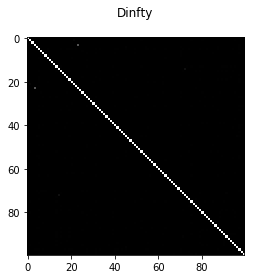

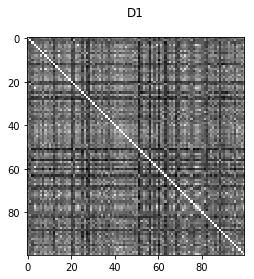

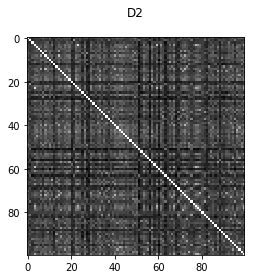

In [7]:
# Compute the three distance matrices for the first 100 images of the training set
%time Dinfty = compute_distance_matrix(100, d_infty)
print()
%time D1 = compute_distance_matrix(100, d_one)
print()
%time D2 = compute_distance_matrix(100, d_two)

# plot them using the function imshow
figure(1)
imshow(Dinfty, cmap='gray_r')
_ = title('Dinfty\n')

figure(2)
imshow(D1, cmap='gray_r')
_ = title('D1\n')

figure(3)
imshow(D2, cmap='gray_r')
_ = title('D2\n')

# Assignment 4

Using only a distance matrix, apply the algorithm described above and compute the efficency of the algorithm, i.e., write a function that:

Given a distance matrix with shape `(N,N)`, constructed on the first `N` samples of the `x_train` set, count the number of failures of the **leave one out** strategy, i.e., 

- set `error_counter` to zero

- for every line `i` of the matrix:

    - find the index `j` (different from `i`) for which `D[i,k] >= D[i,j]` for all `k` different from `i` and `j`.

    - if `y_train[j]` is different from `y_train[i]`, increment by one `error_counter`

- return the error: error_counter/N

- apply the function above to the 3 different distance matrices you computed before

In [8]:
def compute_efficiency(D, N):
    
    # The distance matrix can be computed only once (for each of the three different distances)
    # and then passed as function parameter (D);
    # then we can consider just its first N rows/columns
    # by specifying the desired number by means of  the parameter N
    D = D[0:N,0:N]
    
    # diagonal entries (equal to 0.0) must not be taken into account
    D = numpy.ma.masked_equal(D, 0.0, copy=False)
    
    # set error_counter to zero
    error_counter = 0
    
    # for each row in D
    for i in range(N):
        
        # find the index j (different from i) corresponding to the minimum value
        j = argmin(D[i])
        
        # if y_train[j] is different from y_train[i]
        if (y_train[j] != y_train[i]):
            
            #increment by one error_counter
            error_counter = error_counter + 1
            
    # return the error
    return error_counter/N

In [9]:
# Apply the function above to the 3 different distance matrices computed before

%time err_infty = compute_efficiency(Dinfty, 100)
print()
%time err_1 = compute_efficiency(D1, 100)
print()
%time err_2 = compute_efficiency(D2, 100)

err_infty, err_1, err_2

CPU times: user 28 ms, sys: 3.62 ms, total: 31.6 ms
Wall time: 28 ms

CPU times: user 18.9 ms, sys: 0 ns, total: 18.9 ms
Wall time: 19 ms

CPU times: user 20.5 ms, sys: 3.16 ms, total: 23.7 ms
Wall time: 20.3 ms


(0.58, 0.17, 0.17)

# Assignment 5

Run the algorithm implemented above for N=100,200,400,800,1600 on the three different distances, and plot the three error rate as a function of N (i.e., compute the distance matrix, and compute the efficiency associated to the distance matrix).

You should get an error like:
```
[[ 0.58      0.17      0.17    ]
 [ 0.52      0.145     0.135   ]
 [ 0.4425    0.15      0.135   ]
 [ 0.4       0.145     0.12875 ]
 [ 0.369375  0.1025    0.09375 ]]
```
where each column represents a different norm.

In [10]:
# For N = 100,200,400,800,1600
dim = [100,200,400,800,1600]

# on the three different instances
instances = [d_infty, d_one, d_two]

# compute the distance matrix
matrices = [compute_distance_matrix(max(dim), i) for i in instances]

# compute the efficiency associated to the distance matrix
% time errors = [[compute_efficiency(m,n) for m in matrices] for n in dim]


print("\nChecking that the error obtained matches the values reported above:")
print(np.matrix(errors))

CPU times: user 1.75 s, sys: 24 ms, total: 1.77 s
Wall time: 1.76 s

Checking that the error obtained matches the values reported above:
[[ 0.58      0.17      0.17    ]
 [ 0.52      0.145     0.135   ]
 [ 0.4425    0.15      0.135   ]
 [ 0.4       0.145     0.12875 ]
 [ 0.369375  0.1025    0.09375 ]]


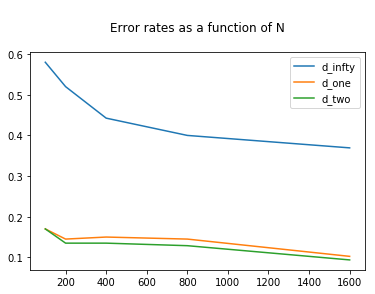

In [11]:
plot(dim, errors)
_ = title("\nError rates as a function of N\n")
_ = legend(["d_infty","d_one","d_two"])

# Assignment 6

In principle, it should be possible to decrease the error by using a better norm. From the table above, it is clear that the L2 distance works better than the L1 distance, which works better than the Linfty distance.

However, *none of these distances exploit the fact that the image is a two-dimensional object*, and that there is information also in the **neighboring** information of the pixels. 

One way to exploit this, is to interpret the image as a continuous function with values between zero and one, defined on a square domain `\Omega=[0,27]x[0,27]`.

$$ f: \Omega \to R $$

- Implement a function that computes an approximation of the $H^1$ norm distance on the renormalized images. Given two images $f_1$ and $f_2$
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Define the $H^1$ distance as
    $$
    d_{H^1}(f_1,f_2) := \sqrt{\int_\Omega |\nabla(a-b)|^2+ (a-b)^2}
    $$
    using the algorithm you prefer (or the library you prefer) to compute the gradients and the integrals. Notice that $\nabla f = (\partial f/\partial x, \partial f/\partial y)$ is a vector valued function, and $|\nabla g|^2 := (\partial g/\partial x)^2 + (\partial g/\partial y)^2$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600


In [12]:
def compute_gradient_squared(f):
    grad = np.gradient(f)
    return grad[0]**2 + grad[1]**2


# Implement a function that computes an approximation of the H1 norm distance on the renormalized images
def d_H1(f1,f2):
    # Given two images  f1  and  f2, compute a and b
    a = f1/np.sum(f1)
    b = f2/np.sum(f2)
    difference = a-b
    
    return sqrt(sum(compute_gradient_squared(difference) + difference**2))

In [13]:
# For N = 100,200,400,800,1600
dim = [100,200,400,800,1600]

# compute the distance matrix
DH1 = compute_distance_matrix(max(dim), d_H1)

# compute the efficiency associated to the distance matrix
% time H1_errors = [compute_efficiency(DH1,n) for n in dim]

print()
print(H1_errors)

CPU times: user 590 ms, sys: 4 ms, total: 594 ms
Wall time: 594 ms

[0.23, 0.175, 0.145, 0.12125, 0.099375]


## Assignment 7

An even better improvement on the previous distance function is given by the following algorithm

- Given two images $f1$ and $f2$:
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Solve 
    $$
    -\Delta \phi = a - b \qquad \text{ in } \Omega
    $$
    $$
    \phi = 0 \text{ on } \partial\Omega
    $$
    - Define the *Monge Ampere* distance
    $$
    d_{MA}(f_1,f_2) = \int_\Omega (a+b)|\nabla \phi|^2
    $$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600

In [14]:
from scipy.sparse import diags
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import splu

In [15]:
def build_laplacian(N):
    diagonals = [1, 1, -4, 1, 1]
    offsets = [-N, -1, 0, 1, N]
    M = -(1)*diags(diagonals, offsets, shape=(N*N, N*N)).toarray()
    for i in range(1,N):
        M[i*N,(i*N)-1] = 0
        M[(i*N)-1,i*N] = 0
    return M

In [16]:
# Testing the correctness of build_laplacian
block_size = 3
my_matrix = build_laplacian(block_size)
my_matrix

array([[ 4., -1., -0., -1., -0., -0., -0., -0., -0.],
       [-1.,  4., -1., -0., -1., -0., -0., -0., -0.],
       [-0., -1.,  4.,  0., -0., -1., -0., -0., -0.],
       [-1., -0.,  0.,  4., -1., -0., -1., -0., -0.],
       [-0., -1., -0., -1.,  4., -1., -0., -1., -0.],
       [-0., -0., -1., -0., -1.,  4.,  0., -0., -1.],
       [-0., -0., -0., -1., -0.,  0.,  4., -1., -0.],
       [-0., -0., -0., -0., -1., -0., -1.,  4., -1.],
       [-0., -0., -0., -0., -0., -1., -0., -1.,  4.]])

In [17]:
N = len(x_train[0])-2
M = build_laplacian(N)

# we want M in CSC format ("Compressed Sparse Column")
M = csc_matrix(M)
# to compute its LU decomposition 
LU = splu(M)

In [18]:
def solve_sys(image):
    interior = image[1:-1,1:-1].ravel()
    u = LU.solve(interior)
    u = reshape(u,(N,N))
    solution = zeros((N+2,N+2))
    solution[1:-1,1:-1] = u
    return solution

In [19]:
# Implement a function that computes the Monge Ampere distance
def d_MA(f1,f2):
    
    # Given two images  f1  and  f2, compute a and b
    a = f1/sum(f1)
    b = f2/sum(f2)
    difference = a-b
    
    phi = solve_sys(difference)
    
    return sum((a+b)*compute_gradient_squared(phi))

In [21]:
# For N = 100,200,400,800,1600
dim = [100,200,400,800,1600]

# compute the distance matrix
DMA = compute_distance_matrix(max(dim), d_MA)

# compute the efficiency associated to the distance matrix
% time MA_errors = [compute_efficiency(DMA,n) for n in dim]

print()
print(MA_errors)

CPU times: user 596 ms, sys: 4 ms, total: 600 ms
Wall time: 600 ms

[0.24, 0.2, 0.145, 0.12875, 0.12125]


In [22]:
for i in range(len(errors)):
    errors[i].append(H1_errors[i])
    errors[i].append(MA_errors[i])
print(np.matrix(errors))

[[ 0.58      0.17      0.17      0.23      0.24    ]
 [ 0.52      0.145     0.135     0.175     0.2     ]
 [ 0.4425    0.15      0.135     0.145     0.145   ]
 [ 0.4       0.145     0.12875   0.12125   0.12875 ]
 [ 0.369375  0.1025    0.09375   0.099375  0.12125 ]]


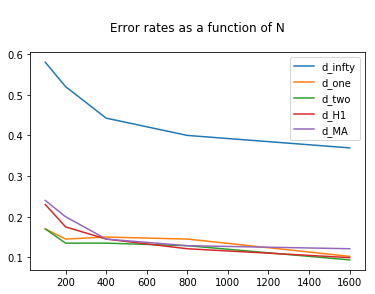

In [23]:
plot(dim, errors)
_ = title("\nError rates as a function of N\n")
_ = legend(["d_infty","d_one","d_two", "d_H1", "d_MA"])